<a href="https://colab.research.google.com/github/otavio-s-s/data_science/blob/master/Analysing%20New%20York%20City%20Airbnb%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysing New York City Airbnb Data**

[Airbnb](https://www.https://www.airbnb.com/) is considered one of the [biggest hotel chains in the world](https://www.theguardian.com/technology/2019/may/05/airbnb-homelessness-renting-housing-accommodation-social-policy-cities-travel-leisure). And it does not own a single hotel room!

The company became successful by connecting travelers who need a place to stay with the so-called hosts, people who are willing to rent their places. In the Airbnb platform, it is possible to book everything from a shared room in a house with other people to an entire apartment or hotel room.

Founded in 2008, Airbnb has already hosted over [300 million guests and aims to reach 1 billion](https://www.sfchronicle.com/business/article/Airbnb-aims-for-1-billion-annual-guests-in-a-12633657.php) by the time it turns 20, in 2028.


<p align="center">
  <img  src="https://www.melhoresdestinos.com.br/wp-content/uploads/2015/11/Dicas-Airbnb.jpg">
</p>


The company also makes a lot of its data available for free. Through the [Inside Airbnb](http://insideairbnb.com/index.html) website, anyone can have access to a great amount of information about Airbnb operation in the most important cities in the world.

In this project, we will work with a dataset of New York City properties advertised on the platform. This dataset contains information about the prices, locations, reviews, room types, hosts, and more for over 50,000 rooms.

Our main goal is to take some insights from the data, such as the most common room types, locations, and how the prices vary depending on the room type and the location of the property.

To accomplish this goal, we'll need to go through the following steps:
* Getting and exploring the data;
* Cleaning the data;
* Analyzing the data.

Python and its powerful libraries will be our tool to get this job done!

## **New York City**

[New York City](https://en.wikipedia.org/wiki/New_York_City) is the most populous city in the United States, with over eight million inhabitants, and it is the center of the largest metropolitan area in the world by urban landmass, the New York metropolitan area. Considered the cultural, financial, and media capital of the world, New York is the home of the United Nations Headquarters. The city is composed of five boroughs: Brooklyn, Queens, Manhattan, the Bronx, and Staten Island.

With numerous famous attractions, such as Central Park, Times Square, the Brooklyn Bridge, and the Empire State Building, New York receives over sixty million visitors every year which generated an all-time high $61.3 billion in overall economic impact for New York City in 2014. Such numbers make New York City a huge Airbnb hub and a great topic for our analysis.
<p align="center">
  <img  src="https://www.imagemhost.com.br/images/2020/06/05/1dec0fa5607e4fb17.jpg">
</p>

<p align="center">
<a align="center"href="https://www.freepik.com/free-photos-vectors/water">Water photo created by freepik - www.freepik.com</a>
</p>

## **The Data**

We'll begin by importing:

* `pandas` for data manipulation;
* `seaborn` and `matplotlib` for data visualization;
* `folium` to deal with geographical data.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Now let's read the data into a DataFrame.

In [0]:
ny = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2020-05-06/visualisations/listings.csv')

## **Exploring the Dataset**

Before we perform any analysis, we'll first see what our dataset looks like. These are the variables it contains:

* id - id number that identifies the property
* name - Property name
* host_id - id number that identifies the host
* host_name - Host name
* neighbourhood_group - The main regions of the city
* neighbourhood - The neighbourhoods
* latitude - Property latitude
* longitude - Property longitude
* room_type - Type of the room
* price - The price for one night
* minimum_nights - Minimum amount of nights to book the place
* number_of_reviews - Number of reviews received
* last_review - Date of the last review
* reviews_per_month - Amount of reviews per month
* calculated_host_listings_count - Number of properties available on Airbnb owned by the host
* availability_365 - Number of days of availability within 365 days

Now let's display its first five rows.

In [3]:
ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.38,2,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,318,2020-04-26,4.66,1,261
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.58,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.38,1,365


Using the `info` method, we'll be able to see the size of the dataset as well as some information about each column, such as the number of non-null values and the type of the data it contains.

In [4]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50246 entries, 0 to 50245
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              50246 non-null  int64  
 1   name                            50228 non-null  object 
 2   host_id                         50246 non-null  int64  
 3   host_name                       50235 non-null  object 
 4   neighbourhood_group             50246 non-null  object 
 5   neighbourhood                   50246 non-null  object 
 6   latitude                        50246 non-null  float64
 7   longitude                       50246 non-null  float64
 8   room_type                       50246 non-null  object 
 9   price                           50246 non-null  int64  
 10  minimum_nights                  50246 non-null  int64  
 11  number_of_reviews               50246 non-null  int64  
 12  last_review                     

We can now see the amount of data we have: 50,246 rows and 16 columns.

Notice that some columns contain null data. This is usually not good. Let's investigate if the number of null values is significant and then decide what to do with it.

In [5]:
(round(ny.isnull().sum() / ny.shape[0] * 100, 2)).sort_values(ascending=False)

reviews_per_month                 21.95
last_review                       21.95
name                               0.04
host_name                          0.02
availability_365                   0.00
calculated_host_listings_count     0.00
number_of_reviews                  0.00
minimum_nights                     0.00
price                              0.00
room_type                          0.00
longitude                          0.00
latitude                           0.00
neighbourhood                      0.00
neighbourhood_group                0.00
host_id                            0.00
id                                 0.00
dtype: float64

Good news! Only the `last_review` and `reviews_per_month` columns contain a significant amount of null values. As both of these columns are not the focus of our analysis, this will not be a problem. Later in this project, we will drop them.

The `name` and `host_name` columns also contain null values, but this also will not affect our project since we are not performing any analysis on them. Also, the number of null values is irrelevant.

### **Variable Distribution**

We'll now plot some histograms in order to see the distribution for each variable and start looking for outliers.

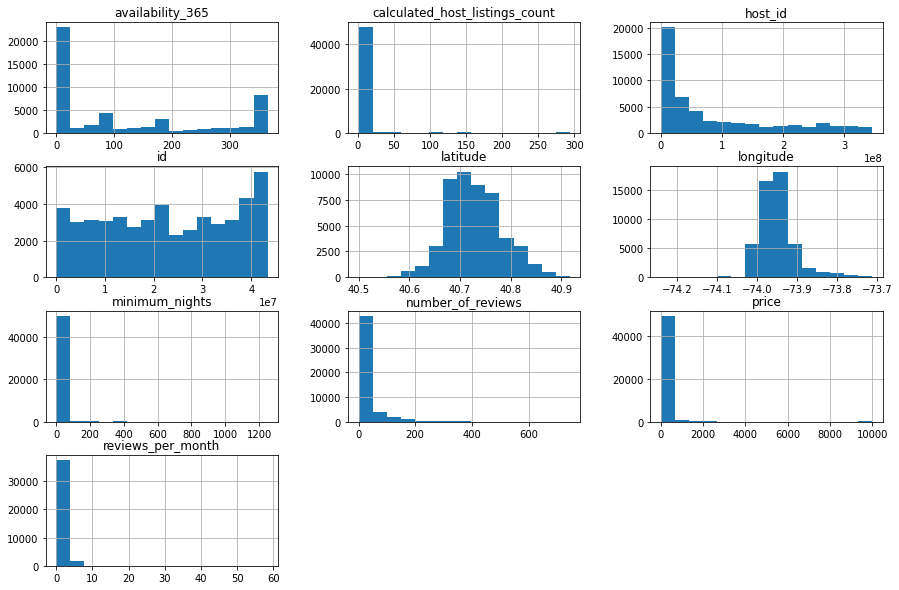

In [6]:
ny.hist(bins=15, figsize=(15,10));

Looking at the histograms, we can notice that some important variables like `price` and `minimum_nights` our poorly distributed. In order to better identify these problems, let's see more statistics about the dataset using the `describe` method.

In [7]:
ny[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,50246.000000,50246.000000,50246.000000,39216.000000,50246.000000,50246.000000
mean,163.130777,7.912968,24.410978,1.091541,7.046292,121.786530
std,421.687803,21.472286,48.609159,1.425768,28.428846,140.634991
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,68.000000,1.000000,1.000000,0.160000,1.000000,0.000000
50%,104.000000,3.000000,5.000000,0.510000,1.000000,65.000000
75%,175.000000,5.000000,24.000000,1.570000,2.000000,249.000000
max,10000.000000,1250.000000,746.000000,58.430000,294.000000,365.000000


It is easy to see that some values do not make sense. Let's look at the `price` column for instance. The average price is \$163.13 and 75% of that prices are below \$175, however, the maximum price is \$10,000. Also, the minimum value is $0.

The same happens in the `minimum_nights` column, where the maximum value is 1,250! How can someone expect to have their place booked if the visitor has to stay at least three and a half years? It makes absolutely no sense!

Values like these distort reality and any analysis we attempt to perform. Now we'll have to deal with them.

### Removing Outliers

We'll plot boxplots for each of these columns so we can take a closer look at their distribution.

Also, let's see how many and what percentages of prices are equal to \$0 and over $500.00 and the percentages of minimum nights that are over 30 nights.

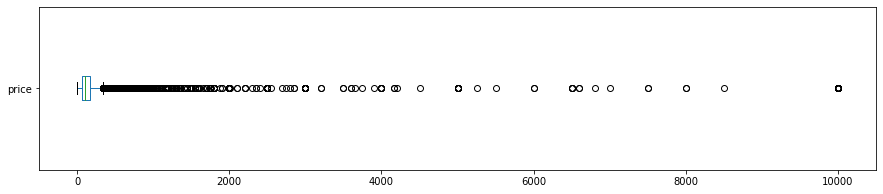

Values over $500.00: 
1139
2.2668%


Values equal to $0: 
26
0.0517%


In [8]:
# Displaying the box plot
ny['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of prices that are equal to $0 and over $500.00
print('Values over $500.00: ')
print(len(ny[ny['price'] > 500]))
print('{:.4f}%'.format((len(ny[ny['price'] > 500]) / ny.shape[0]) * 100))
print('\n')
print('Values equal to $0: ')
print(len(ny[ny['price'] == 0]))
print('{:.4f}%'.format((len(ny[ny['price'] == 0]) / ny.shape[0]) * 100))

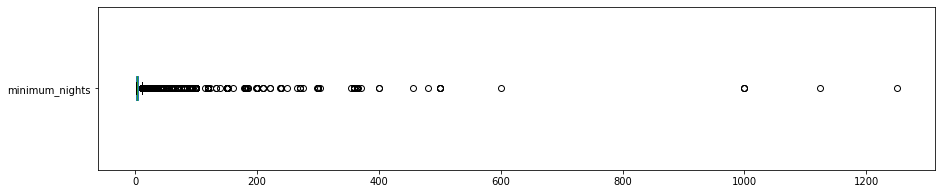

Values over 30 nights: 
772
1.5364%


In [9]:
# Displaying the box plot
ny['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of rooms with the minimum nights value over 30
print('Values over 30 nights: ')
print(len(ny[ny['minimum_nights'] > 30]))
print('{:.4f}%'.format((len(ny[ny['minimum_nights'] > 30]) / ny.shape[0]) * 100))

We can see that only 2.27% of the `price` column is above \$500.00 and only 1.54% of the values in the `minimum_nights` column is above 30. We have 26 elements with price zero as well.

Taking into consideration, as we said earlier, that 75% of these columns' values are below \$175.00 and 5 nights, respectively, it is reasonable to lose roughly 3.8% of the data in order to make it more realistic. Therefore, we'll create a new dataframe, `ny_clean`, that contains only the rows in which the price is more than \$0 and less than $500, and the minimum nights is no more than 30.

Also, probably some columns fulfill both these requirements, which means that we are losing even less than 3.8% of the dataset.

After we create the new dataframe, we'll drop the `reviews_per_month` and `last_review` columns as we said earlier in the project.

Finally, let's see if the histograms look better.

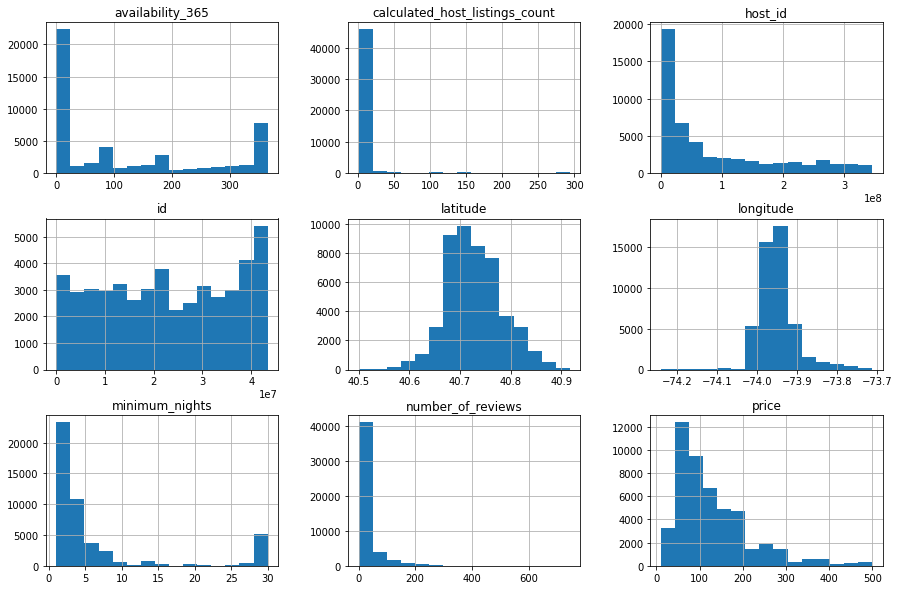

In [10]:
# Selecting the rows that fulfil the established requirements
ny_clean = ny[(ny['price'] <= 500) & (ny['price'] > 0) & (ny['minimum_nights'] <= 30)].copy()

# Droping the columns
ny_clean.drop(['reviews_per_month', 'last_review'], axis=1, inplace=True)
ny_clean.reset_index(drop=True, inplace=True)

# Plotting the histograms againd
ny_clean.hist(bins=15, figsize=(15,10));

We can still see, for example, that the most common prices are still below U$100.00, but the distribution is much more realistic now.

###Correlations

Now let's see if there's any correlation between the numeric variables in the dataset.

We'll first create a correlation matrix using the `corr` method and then we will take advantage of the `heat_map` function from `seaborn` to visualize this matrix.  

In [11]:
corr = ny_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()
corr

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.050787,-0.043062,0.086891,0.076512
minimum_nights,0.050787,1.000000,-0.143330,0.415113,0.259879
number_of_reviews,-0.043062,-0.143330,1.000000,-0.081395,0.194047
calculated_host_listings_count,0.086891,0.415113,-0.081395,1.000000,0.173000
availability_365,0.076512,0.259879,0.194047,0.173000,1.000000


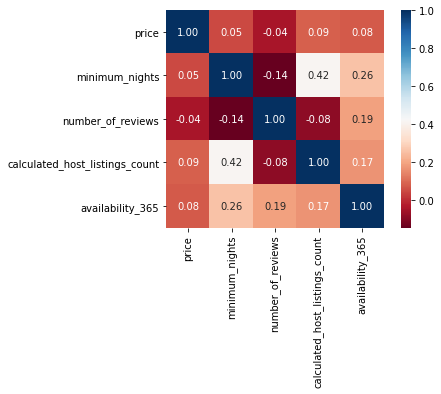

In [12]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

As we can see, the variables do not seem to be significantly correlated to one another.

## Analysis

We are now going to answer some questions and try to get some insights from the dataset. For that, we will frequently use the `value_counts` and `groupby` methods. These are two very powerful tools that allow us to quickly take some useful information out of a large amount of data.

First, let's see which kind of room is more common in the New York City Airbnb.


Entire home/apt    24697
Private room       22150
Shared room         1113
Hotel room           387
Name: room_type, dtype: int64


Entire home/apt    51.08
Private room       45.81
Shared room         2.30
Hotel room          0.80
Name: room_type, dtype: float64




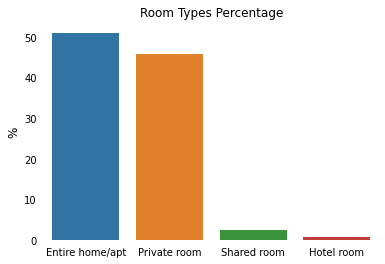

In [13]:
# Calculating the number of rooms for each room type
room_type = ny_clean['room_type'].value_counts().sort_values(ascending=False)

# Calculating the percentage of rooms for each room type
room_type_pct = round(ny_clean['room_type'].value_counts(normalize=True)  * 100, 2)

# Displaying the results
print(room_type)
print('\n')
print(room_type_pct)
print('\n')

# Plotting the percentage of rooms for each room type
ax = sns.barplot(room_type_pct.index, room_type_pct) 
ax.set_title('Room Types Percentage')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('%', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False)

Entire apartments and private rooms dominate the Airbnb market in New York City. Hotel rooms are basically nonexistent.

Now let's see the average prices for each of these room types.

room_type
Hotel room         193.34
Entire home/apt    175.03
Private room        80.11
Shared room         64.64
Name: price, dtype: float64




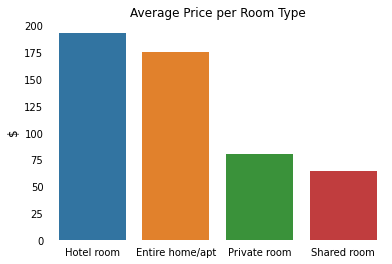

In [14]:
# Calculating the average price per room type
type_price = round(ny_clean.groupby('room_type').price.mean(), 2).sort_values(ascending=False)

# Displaying the results
print(type_price)
print('\n')

# Plottingthe average price per room type
ax = sns.barplot(type_price.index, type_price) 
ax.set_title('Average Price per Room Type')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)

Hotel rooms are the most expensive type of room, on average. This might happen for two reasons:

* Hotels are naturally more expensive because of the number of employees and the services and options available to the guest, such as room service and parking spots;
* There are fewer hotels in the dataset, which distorts the average.

Other than that, it is reasonable to think that entire apartments are more expensive than private rooms and that private rooms are more expensive than shared rooms.

Now, let's take look in the average minimum nights for each room type.

room_type
Entire home/apt    7.68
Shared room        6.01
Private room       5.05
Hotel room         2.63
Name: minimum_nights, dtype: float64




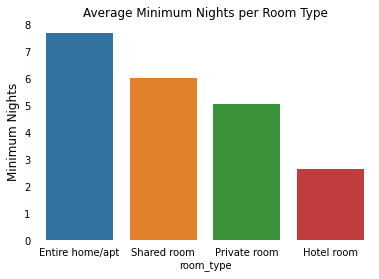

In [15]:
# Calculating the average minimum nights per room type
room_type_nights = round(ny_clean.groupby('room_type').minimum_nights.mean(), 2).sort_values(ascending=False)

# Displaying the results
print(room_type_nights)
print('\n')

# Plotting the average minimum nights per room type
ax = sns.barplot(room_type_nights.index, room_type_nights) 
ax.set_title('Average Minimum Nights per Room Type')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('Minimum Nights', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False)


### **Locations**

We'll now investigate prices in different regions of the city. For this, we'll use the `neighbourhood_group` instead of the `neighborhood` column because it divides the city into five major regions instead of lots of small neighborhoods.

neighbourhood_group
Manhattan        158.92
Brooklyn         112.35
Staten Island     91.44
Queens            90.61
Bronx             84.46
Name: price, dtype: float64




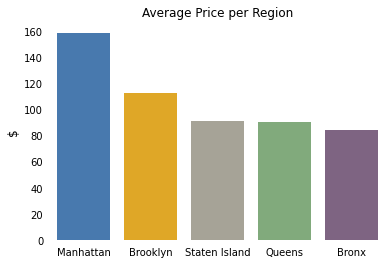

In [16]:
# Calculating the average price per region
price_region = round(ny_clean.groupby('neighbourhood_group').price.mean().sort_values(ascending=False), 2)

# Displaying the results
print(price_region)
print('\n')

# Plotting the average price per region
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]

ax = sns.barplot(price_region.index, price_region, palette=sns.xkcd_palette(colors)) 
ax.set_title('Average Price per Region')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)

Manhattan is considerably more expensive than the rest of the city, which makes perfect sense since it is the richest and the most densely populated part of New York.

Finally, let's see how many rooms are available in each region.

Manhattan        21137
Brooklyn         19610
Queens            6064
Bronx             1176
Staten Island      360
Name: neighbourhood_group, dtype: int64


Manhattan        43.72
Brooklyn         40.56
Queens           12.54
Bronx             2.43
Staten Island     0.74
Name: neighbourhood_group, dtype: float64




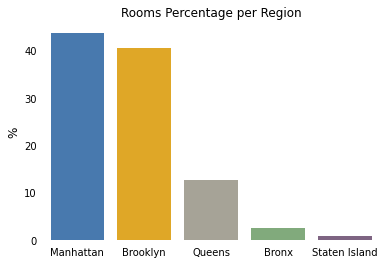

In [17]:
# Calculating the number of rooms per region
room_regions = ny_clean['neighbourhood_group'].value_counts().sort_values(ascending=False)

# Calculating the percentage of rooms per region
room_regions_pct = round(ny_clean['neighbourhood_group'].value_counts().sort_values(ascending=False) / len(ny_clean) * 100, 2)

# Displaying the results
print(room_regions)
print('\n')
print(room_regions_pct)
print('\n')

# Plotting the percentage of rooms per region
ax = sns.barplot(room_regions_pct.index, room_regions_pct, palette=sns.xkcd_palette(colors)) 
ax.set_title('Rooms Percentage per Region')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('%', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)

Despite having the two highest average prices, the Manhattan and Brooklyn regions also have the biggest number of rooms on Airbnb. We can then conclude that those are the most expensive and most requested regions.

## **Geographical Data**

Now that we already have some information about the price distribution for rooms in New York City, let's visualize this data geographically and try to determine which points of the city present higher and lower average prices on Airbnb.

First, we'll create a scatter plot using the `latitude` and `longitude` columns of our dataset.

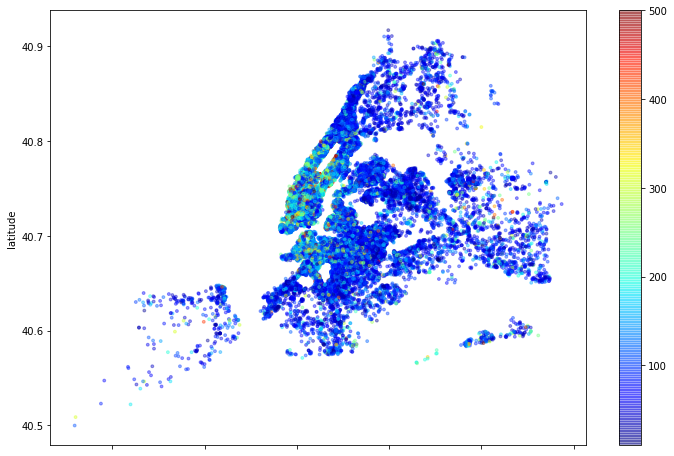

In [18]:
ny_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=ny_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

But it is not easy to see the city in charts like these. In this specific case, as New York is one of the most famous cities in the world, we can see some patterns. For example, we can identify the island of Manhattan and we can see Central Park, the white square in the middle of the island. 

With this in mind, it is easier to see that the prices in Lower Manhattan are higher than most of the other regions on the map. The region around the Brooklyn Bridge presents some higher values and we can see some very high values on the east side of Queens too.

We can have a general idea of what is going on mostly because we are familiar with the city's geography. If that was not the case, it would've been harder to take any insights from this plot.

To improve this visualization and plot a real map, we'll work with `folium` from now on.

### **Folium**

[Folium](https://python-visualization.github.io/folium/) is a library that makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. 

In order to use Folium, though, we need the ZIP codes instead of latitude and longitude and the dataset we are using does not have a ZIP column. We'll use another dataset from Airbnb to accomplish this. This dataset is also available on [Inside Airbnb](http://insideairbnb.com/get-the-data.html).


#### **Preparing the Data**

This dataset has 106 columns and much more information than the one we are using. Let's read it into a dataframe.

In [19]:
ny_big = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2020-05-06/data/listings.csv.gz', compression='gzip')
ny_big.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(50246, 106)

Notice that it has the same number of rows as our original dataset. Let's see its first five rows.

In [20]:
ny_big.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2060,https://www.airbnb.com/rooms/2060,20200506054410,2020-05-09,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/3755/3f9d3...,NaN,2259,https://www.airbnb.com/users/show/2259,Jenny,2008-08-18,US,NaN,a few days or more,22%,50%,f,https://a0.muscache.com/im/users/2259/profile_...,https://a0.muscache.com/im/users/2259/profile_...,Washington Heights,0.0,0.0,['reviews'],t,f,"New York, NY, United States",Washington Heights,Washington Heights,...,$0.00,1,730,1,1,730,730,1.0,730.0,3 months ago,t,1,1,1,1,2020-05-09,1,0,2008-09-22,2008-09-22,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,0,1,0,0.01
1,2595,https://www.airbnb.com/rooms/2595,20200506054410,2020-05-08,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,"Make yourself at home, respect the space and t...",NaN,NaN,https://a0.muscache.com/im/pictures/f0813a11-4...,NaN,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a few hours,96%,35%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, NY, United States",Manhattan,Midtown,...,$0.00,3,1125,3,3,1125,1125,3.0,1125.0,2 months ago,t,30,60,90,365,2020-05-08,48,4,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.38
2,3831,https://www.airbnb.com/rooms/3831,20200506054410,2020-05-08,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,"IF YOU ARE SAME-DAY BOOKING, PLEASE LET ME KNO...",B52 bus for a 10-minute ride to downtown Brook...,"You will have the private, exclusive use of an...","We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,https://a0.muscache.com/im/pictures/e49999c2-9...,NaN,4869,https://www.airb

Notice that it contains an `id` column with the same ids we have in the `ny` dataframe.

We'll use this new dataset to create the `zip` dataframe with only the two columns we need, the `id` and `zipcode` columns.

In [21]:
zips = ny_big[['id', 'zipcode']]
zips.shape

(50246, 2)

And now let's merge it into our other dataframe. 

From now on we'll only use the `merged` dataframe. Let's also see some information about it.

In [22]:
merged = ny_clean.merge(right=zips, on='id', how='left')
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48347 entries, 0 to 48346
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48347 non-null  int64  
 1   name                            48330 non-null  object 
 2   host_id                         48347 non-null  int64  
 3   host_name                       48337 non-null  object 
 4   neighbourhood_group             48347 non-null  object 
 5   neighbourhood                   48347 non-null  object 
 6   latitude                        48347 non-null  float64
 7   longitude                       48347 non-null  float64
 8   room_type                       48347 non-null  object 
 9   price                           48347 non-null  int64  
 10  minimum_nights                  48347 non-null  int64  
 11  number_of_reviews               48347 non-null  int64  
 12  calculated_host_listings_count  

We have a total of 48,347 rows in our `merged` dataframe.

The bad news is that we have some null values in the zip column. Let's see if it is a significant amount.

In [23]:
merged['zipcode'].isnull().sum() / len(merged) * 100

0.8687198792065691

Fortunately, we have very few null values. We can afford to drop them. Let's do it.

In [24]:
merged.dropna(subset=['zipcode'], axis=0, inplace=True)

print('Null values: {}'.format(merged['zipcode'].isnull().sum()))
merged.shape

Null values: 0


(47927, 15)

Null values dropped and we are left with 47,927 rows in the dataset.

Let's display the unique values in the `zipcode` column to see if there's any cleaning to be done.

In [25]:
merged['zipcode'].unique()

array(['10040', '10018', '11238', '10016', '11216', '10019', '10025',
       '10002', '10036', '10014', '11215', '11211', '10029', '11205',
       '11217', '10034', '10003', '10031', '10027', '11237', '11226',
       '10009', '11225', '11101', '11221', '11206', '11222', '10010',
       '11249', '10001', '10162', '11231', '10035', '10032', '11377',
       '11233', '10023', '10128', '11234', '11201', '11367', '10024',
       '10028', '10069', '11104', '10065', '10301', '10013', '10452',
       '10039', '11385', '10021', '10011', '10075', '11434', '11379',
       '10026', '11105', '10044', '10022', '11103', '10280', '11218',
       '10473', '10475', '10468', '11102', '10033', '11427', '11693',
       '10012', '11375', '10470', '10030', '11207', '10453', '11223',
       '10469', '11208', '11235', '10314', '11209', '11204', '10305',
       '11691', '11368', '11232', '10017', '11373', '11224', '11412',
       '10004', '11203', '11374', '10466', '11213', '11106', '10304',
       '11220', '112

Yes, there is some cleaning to be done. Here's what it's wrong and how we'll fix it:

* Some values start with the string "NY", we need to remove it;
* One value has extra whitespaces before it, we'll use `strip` to fix this;
* We use the `split` method to get only the first part of values in the following formats:

  * `11413-3220`
  * `11249\n11249`

* We'll convert the entire column to string. We need these values as strings to plot the map.



In [26]:
# Removing the "NY" string and extra whitespaces
merged['zipcode'] = merged['zipcode'].str.replace('NY ', '').str.strip()

# Using split on the values mentioned above
merged['zipcode'] = merged['zipcode'].apply(lambda x: (str(x).split('-'))[0])
merged['zipcode'] = merged['zipcode'].apply(lambda x: (str(x).split('\n'))[0])

# Converting the values to string
merged['zipcode'] = merged['zipcode'].astype(str)
merged['zipcode'].unique()

array(['10040', '10018', '11238', '10016', '11216', '10019', '10025',
       '10002', '10036', '10014', '11215', '11211', '10029', '11205',
       '11217', '10034', '10003', '10031', '10027', '11237', '11226',
       '10009', '11225', '11101', '11221', '11206', '11222', '10010',
       '11249', '10001', '10162', '11231', '10035', '10032', '11377',
       '11233', '10023', '10128', '11234', '11201', '11367', '10024',
       '10028', '10069', '11104', '10065', '10301', '10013', '10452',
       '10039', '11385', '10021', '10011', '10075', '11434', '11379',
       '10026', '11105', '10044', '10022', '11103', '10280', '11218',
       '10473', '10475', '10468', '11102', '10033', '11427', '11693',
       '10012', '11375', '10470', '10030', '11207', '10453', '11223',
       '10469', '11208', '11235', '10314', '11209', '11204', '10305',
       '11691', '11368', '11232', '10017', '11373', '11224', '11412',
       '10004', '11203', '11374', '10466', '11213', '11106', '10304',
       '11220', '112

Almost there!

Notice that there's an empty value ' '. This is a problem. We need to see if there are many values like this in the dataset to decide how to proceed. Let's check this.


In [27]:
merged[merged['zipcode'] == '']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,zipcode
8569,7734116,Private tidy room 15 min/Manhattan,18523979,Marko,Queens,Sunnyside,40.74416,-73.9157,Private room,300,1,74,2,365,


Only one empty value, that's good!

Let's drop this row and see how many rows we have left.

In [28]:
merged = merged[merged['zipcode'] != '']
merged.reset_index(drop=True, inplace=True)
merged.shape

(47926, 15)

All set!

We have 47,926 rows left in our completely clean dataset!



#### **Plotting the Map with Folium**

Finally, we'll plot the map. To do this, we'll follow these five steps:

* Create a figure;
* Create the map;
* Create the [Choropleth](https://en.wikipedia.org/wiki/Choropleth_map) layer;
* Create some markers on the map pointing to some famous New York attractions;
* Display the map.

In [29]:
# Creating the figure
fig = folium.Figure(width=750, height=750)

# Creating the map
m = folium.Map(location=[40.695256, -74.00272], min_zoom=10)

# Creating the Choropleth
airbnb_geo = folium.Choropleth(
    geo_data = 'https://raw.githubusercontent.com/fedhere/PUI2015_EC/master/mam1612_EC/nyc-zip-code-tabulation-areas-polygons.geojson',
    name='ny_airbnb',
    data = merged,
    columns=['zipcode', 'price'],
    key_on='feature.properties.postalCode',
    fill_color='OrRd',
    highlight = True,
    bins=6,
    nan_fill_color='white',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name = 'Mean Price',
    show=True
    
 ).add_to(m)

# Creating the markers
folium.Marker(
    location=[40.780184, -73.969145],
    popup='Central Park',
    icon=folium.Icon(color='green')
).add_to(m)

folium.Marker(
    location=[40.6892534,-74.0466891],
    popup='Statue of Liberty National Monument',
    icon=folium.Icon(color='green')
).add_to(m)

folium.Marker(
    location=[40.748441,  -73.985664],
    popup='Empire State Building',
    icon=folium.Icon(color='blue')
).add_to(m)

folium.Marker(
    location=[40.707417, -74.010837],
    popup='Wall Street',
    icon=folium.Icon(color='blue')
).add_to(m)

folium.Marker(
    location=[40.758896,-73.985130],
    popup='Times Square',
    icon=folium.Icon(color='blue')
).add_to(m)

folium.Marker(
    location=[40.752394,-73.977599],
    popup='Grand Central Terminal',
    icon=folium.Icon(color='blue')
).add_to(m)

folium.Marker(
    location=[40.7060113,-73.9988595],
    popup='Brooklyn Bridge',
    icon=folium.Icon(color='blue')
).add_to(m)

folium.Marker(
    location=[40.712742,-74.013382],
    popup='One World Trade Center',
    icon=folium.Icon(color='blue')
).add_to(m)

# Displaying the map
fig.add_child(m)
m

<p align="center">
  <img  src="https://www.imagemhost.com.br/images/2020/06/06/ny.jpg">
</p>

<p align="center">
This is just an image. GitHub does not support Folium's maps. If you want to interact with the map, click
<a align="center"href="https://nbviewer.jupyter.org/github/otavio-s-s/data_science/blob/master/Analysing%20New%20York%20City%20Airbnb%20Data.ipynb">here</a> or see this project on <a align="center"href="https://colab.research.google.com/github/otavio-s-s/data_science/blob/master/Analysing%20New%20York%20City%20Airbnb%20Data.ipynb">Colab</a>.
</p>

Now we have a good visualization of New York City Airbnb prices.

As expected, Lower Manhattan is a very expensive region of the city and it is also where the most famous attractions are located, which certainly influences the high prices by increasing the demand for rooms.

The Bronx and Staten Island are low prices regions. Each of them has one more expensive area, but this might be related to the small number of rooms in these regions, which can distort the average price, as we saw earlier in the project.

Brooklyn and Queens are very mixed prices regions. Although the bigger part of these regions consists of low price areas, they also have a significant amount of expensive neighborhoods. The areas closer to Manhattan tend to be more expensive, for instance. Some areas in the south of Brooklyn also contain some higher prices as well as the east side of Queens, as we mentioned when we discussed the scatter map.

## **Conclusion**

During the project, we performed some interesting analysis of the New York City Airbnb data and managed to answer some questions, such as:

* What kind of room is more common in New York City Airbnb?
* What is the price difference between different types of rooms?
* What are the most expensive regions to stay in New York?

We could also see how to use Python to go from a text file to a complete interactive map.

To accomplish such goals, we went through major data manipulation steps, such as exploring, cleaning, analyzing, and visualizing data.


With all that said, the conclusions are:

* Private rooms and entire apartments are the most common room types;
* Hotel rooms and entire apartments are usually more expensive than private and shared rooms;
* Over 80% of the rooms are located in Manhattan and Brooklyn, which are also the most expensive regions;
* Yes, if you want to stay close to the major attractions of the city you'll probably expend more money.